In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [2]:
dpath = Path("../../py_data/HEXPractice")
ks = [1, 50, 100, 150, 200]
nk = len(ks)

'''
mode:
cinlet: constant inlents
rinlet: random inlents
'''
mode = "rinlet"

# f_type: 0 - parallel flow, 1 - counter flow
f_type = 1

if f_type == 0:
    dfs = pd.read_csv(f"{dpath}/{mode}/parallel.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/parallel_day_{k}.csv", header=0)')
elif f_type == 1:
    dfs = pd.read_csv(f"{dpath}/{mode}/counter.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/counter_day_{k}.csv", header=0)')

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1Nu,F1h,F1R,...,F2Re,F2h,F2R,F2Cf,F2Tau,dP2,Sigma2,Rf2,UA,Q
0,1,0.270541,574.290942,786.865165,0.970381,0.019860,4.336149e+06,1556.195359,9402.993106,0.027943,...,18133.210857,5750.215040,0.035727,0.003930,3.030818,8642.272901,0.0,0.0,15.316843,109269.132748
1,2,0.320617,567.071459,766.391266,1.152287,0.019840,5.143869e+06,1784.073193,10790.639114,0.024374,...,20084.742056,6240.182968,0.032922,0.003912,3.701207,10327.617937,0.0,0.0,14.000677,121420.109521
2,3,0.270638,567.672821,781.875336,0.973914,0.019828,4.344813e+06,1558.682247,9433.458928,0.027899,...,20717.476039,6396.962328,0.032115,0.003906,3.932717,10902.049350,0.0,0.0,12.234718,110145.601305
3,4,0.267419,573.529608,766.461430,0.964140,0.019809,4.297168e+06,1544.993415,9359.398623,0.028146,...,17904.904829,5692.223324,0.036091,0.003932,2.956703,8453.714213,0.0,0.0,10.318931,98027.998495
4,5,0.299512,563.137333,752.820705,1.081583,0.019793,4.816738e+06,1692.712204,10262.511033,0.025690,...,21246.495687,6527.308880,0.031474,0.003902,4.131594,11392.738720,0.0,0.0,10.141181,107943.703904


In [4]:
x = dfs["Day"].to_numpy()

### 2. Plots of data (overall or average) vs. days

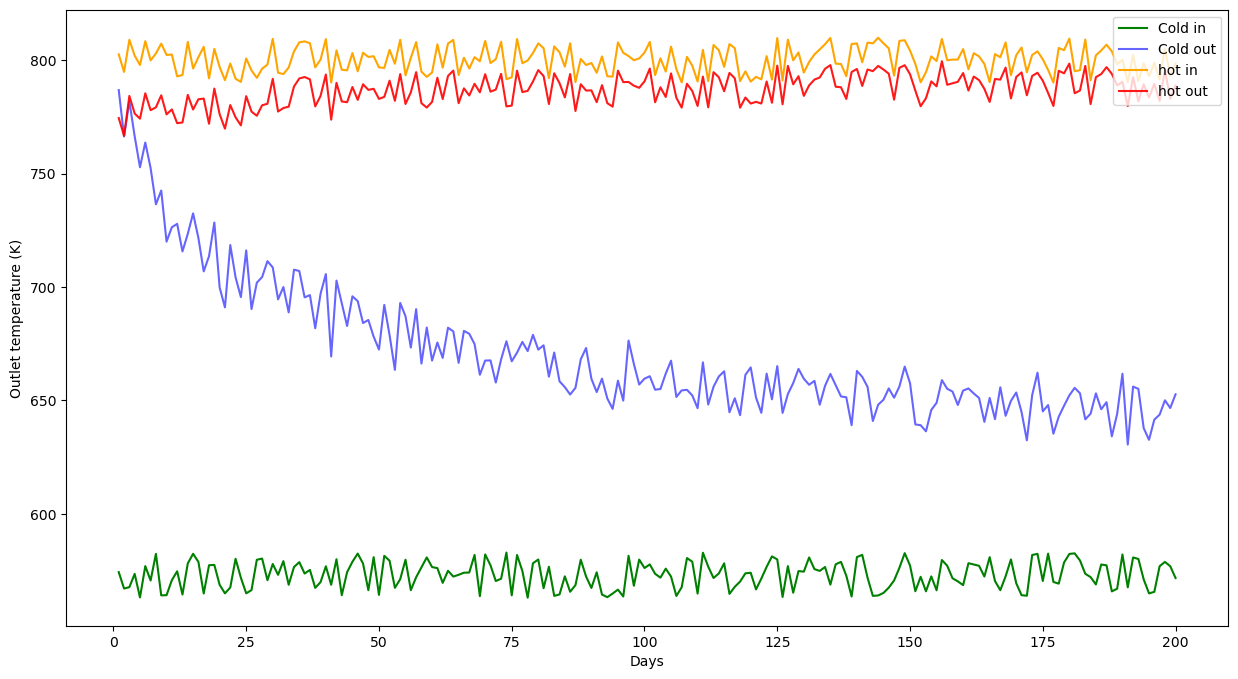

In [5]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(x, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(x, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(x, dfs["F2i"].to_numpy(), c="orange", label="hot in")
ax.plot(x, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


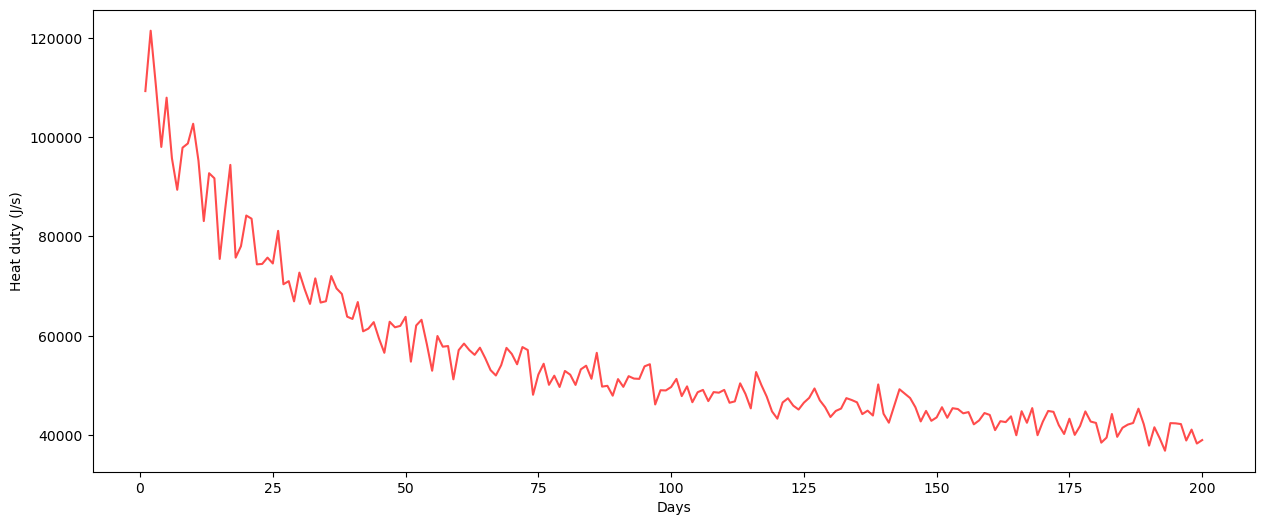

In [6]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

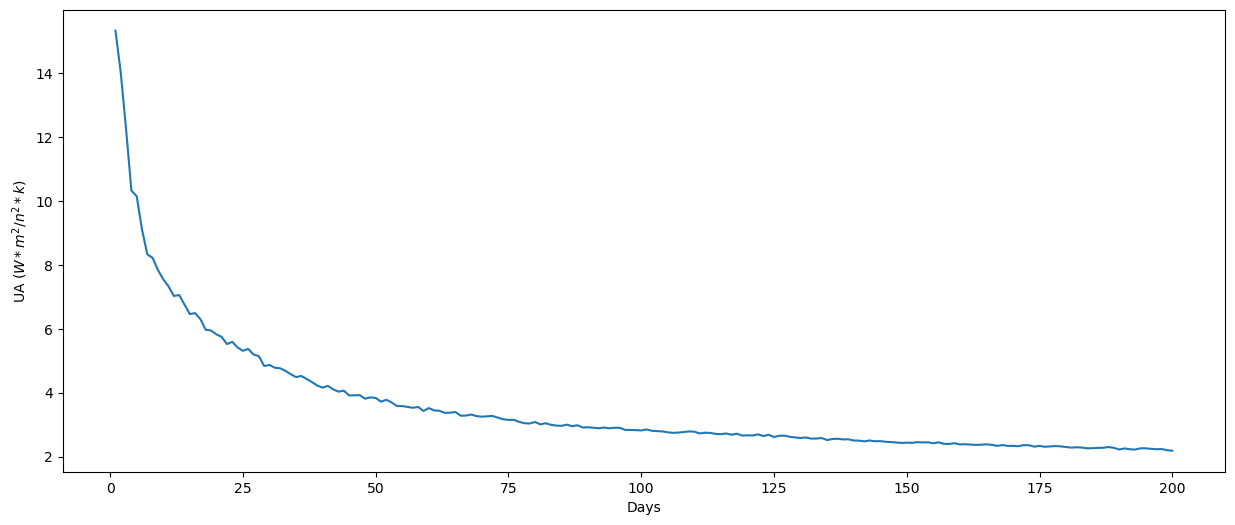

In [7]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["UA"].to_numpy())
plt.ylabel("UA ($W*m^2/n^2*k$)")
plt.xlabel("Days")
plt.show()

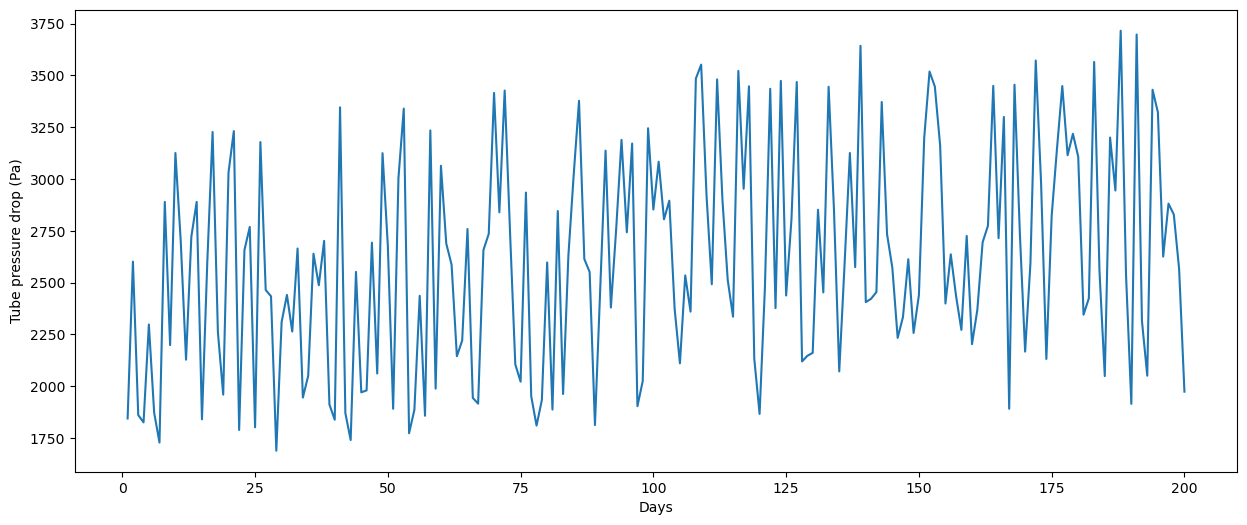

In [8]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["dP1"].to_numpy())
plt.ylabel("Tube pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

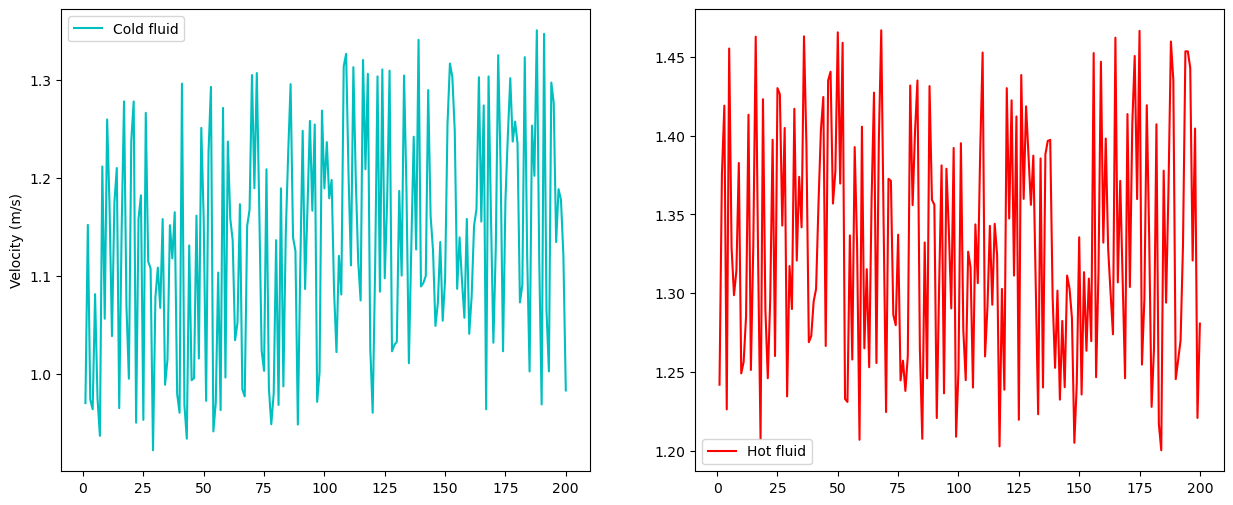

In [9]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(x, dfs["F1v"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(x, dfs["F2v"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].legend()
ax[1].legend()
plt.show()


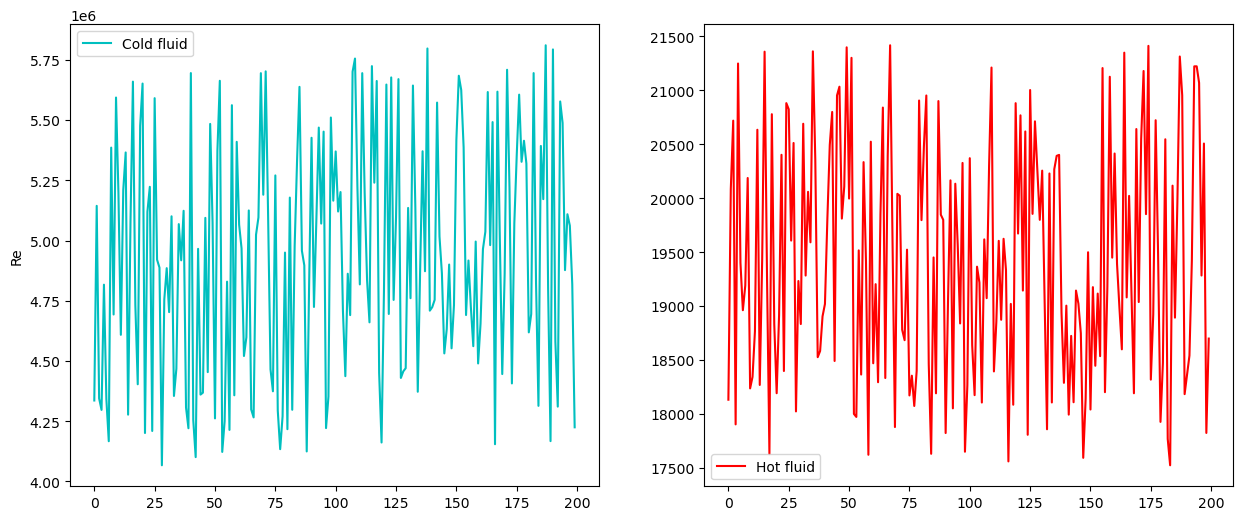

In [10]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["F1Re"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(dfs["F2Re"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].legend()
ax[1].legend()
plt.show()


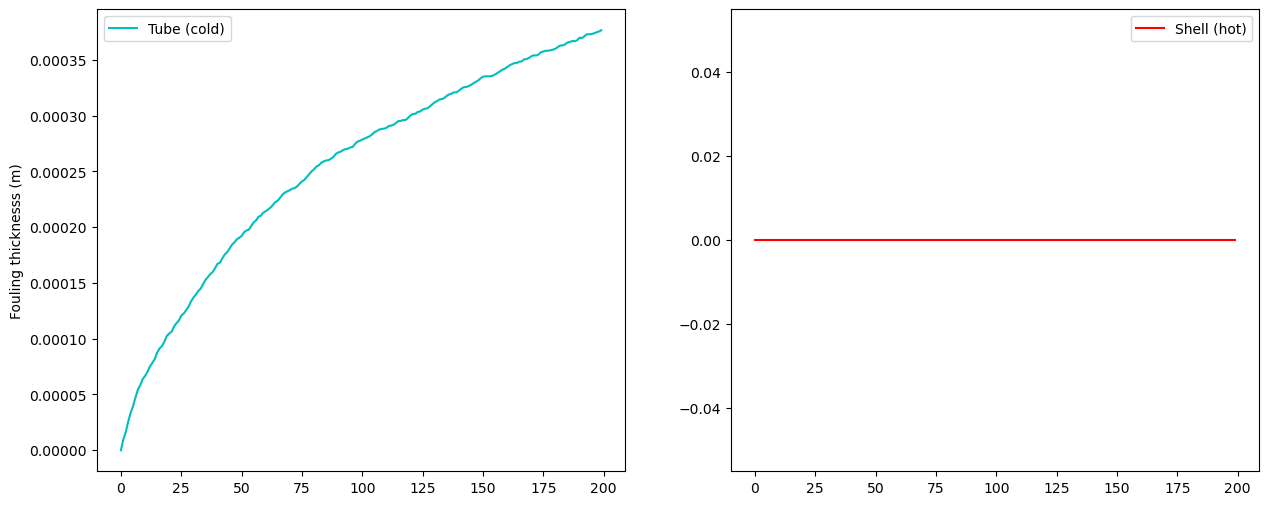

In [11]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(dfs["Sigma1"].to_numpy(), c="c", label="Tube (cold)")
ax[1].plot(dfs["Sigma2"].to_numpy(), c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].legend()
ax[1].legend()
plt.show()

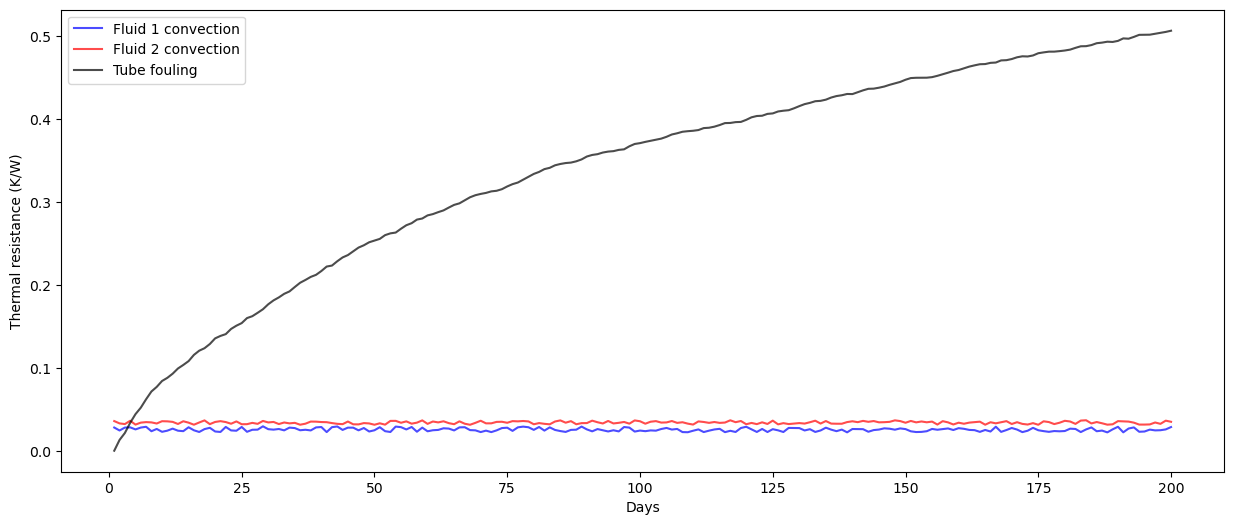

In [12]:
# Resistances vs. time
plt.figure(figsize=(15, 6))
plt.plot(x, dfs["F1R"].to_numpy(), c="b", alpha=0.7, label="Fluid 1 convection")
plt.plot(x, dfs["F2R"].to_numpy(), c="r", alpha=0.7, label="Fluid 2 convection")
plt.plot(x, dfs["Rf1"].to_numpy(), c="black", alpha=0.7, label="Tube fouling")
plt.ylabel("Thermal resistance (K/W)")
plt.xlabel("Days")
plt.legend()
plt.show()

### 2. Plots of data vs. HEX distance of specific days

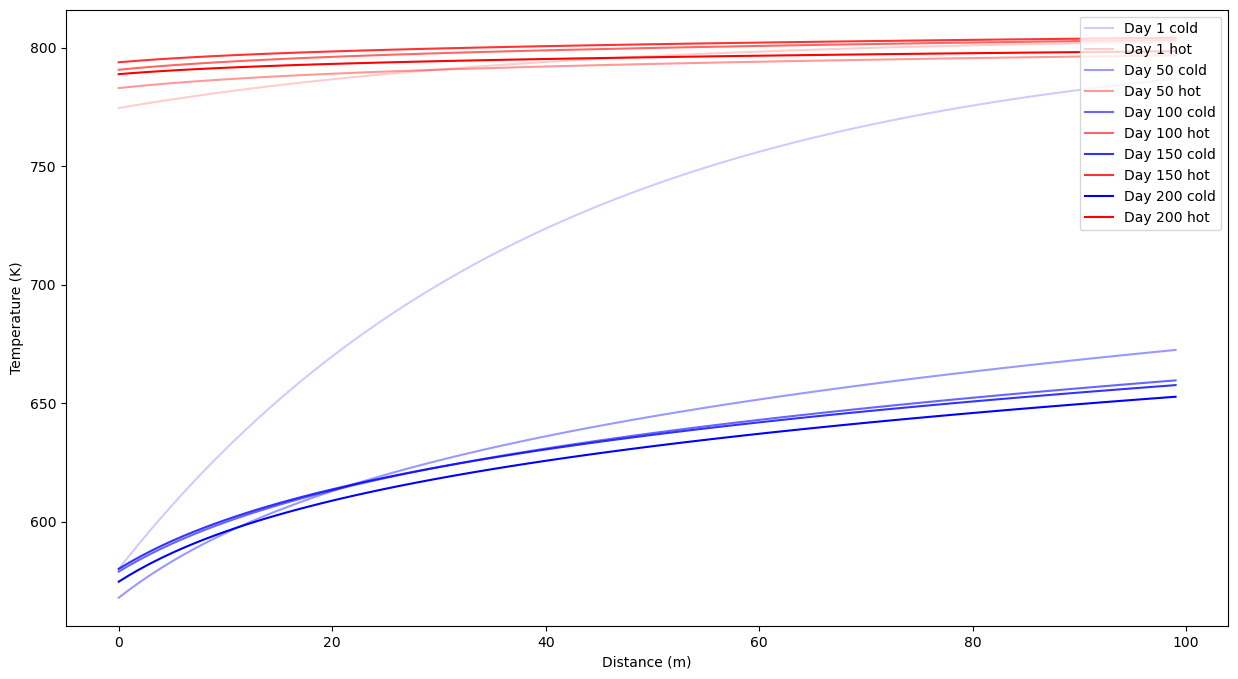

In [13]:
# temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(df_day{k}["F1T"].to_numpy(), c="blue", alpha={1 / nk * i}, label="Day {k} cold")')
    exec(f'ax.plot(df_day{k}["F2T"].to_numpy(), c="red", alpha={1 / nk * i}, label="Day {k} hot")')
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

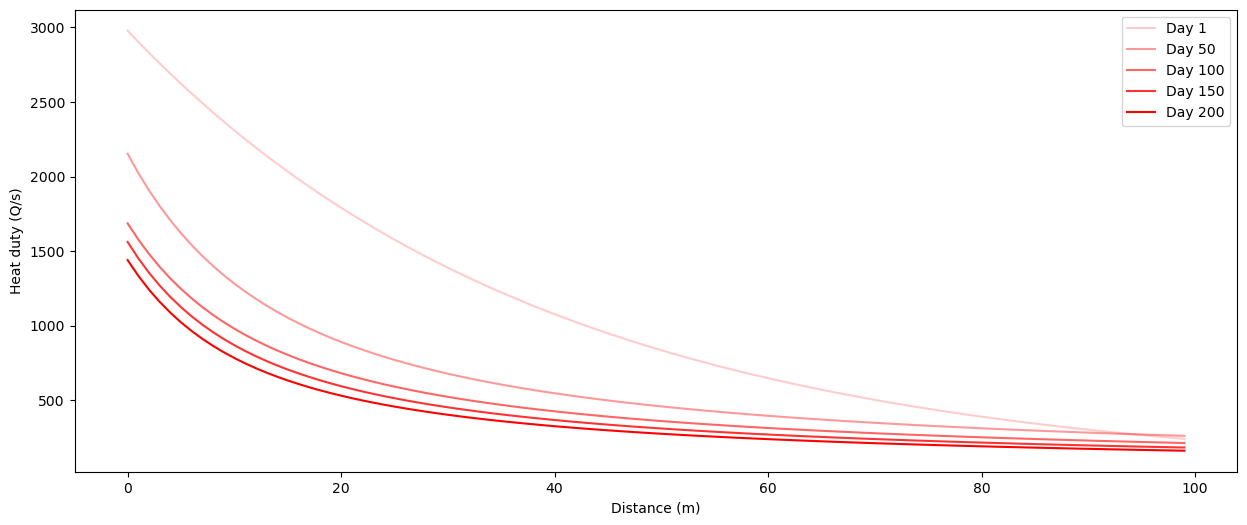

In [14]:
# heat duty vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(df_day{k}["Q"].to_numpy(), c="r", alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Heat duty (Q/s)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

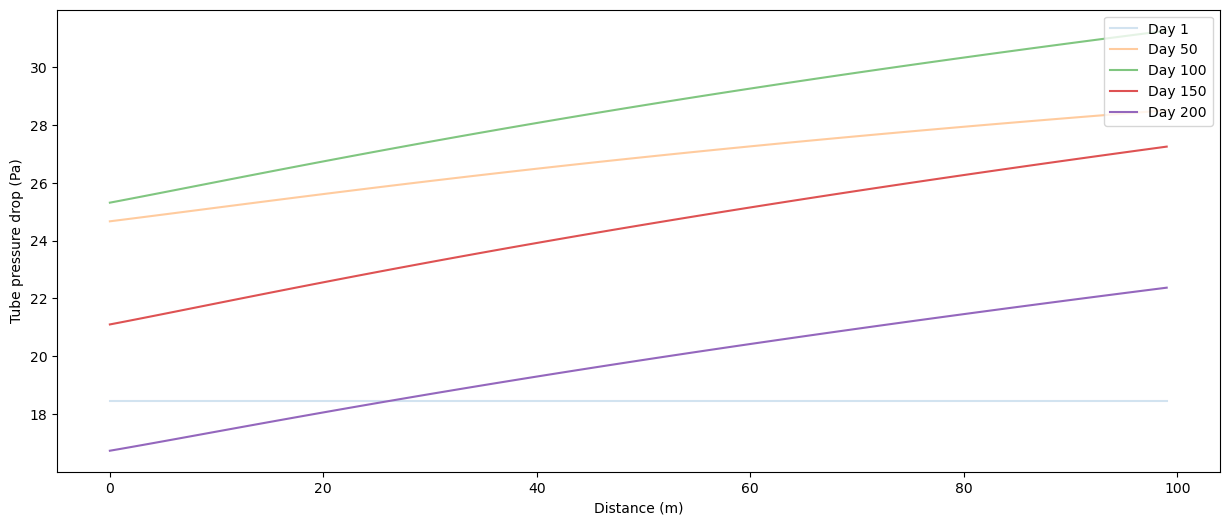

In [15]:
# pressure drop vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(df_day{k}["dP1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Tube pressure drop (Pa)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

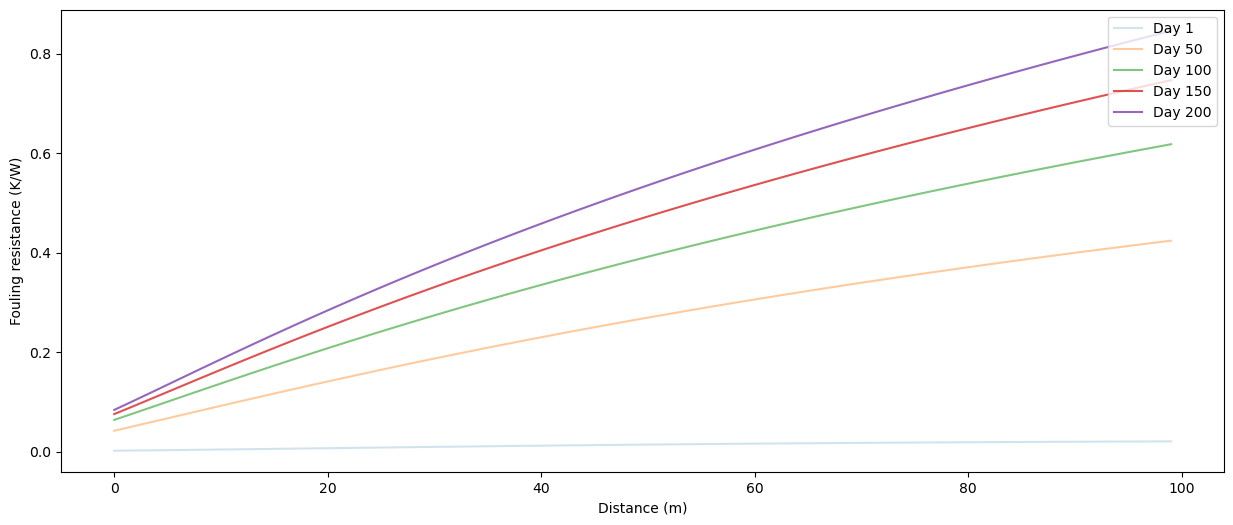

In [16]:
# fouling resistance vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(df_day{k}["Rf1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling resistance (K/W)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

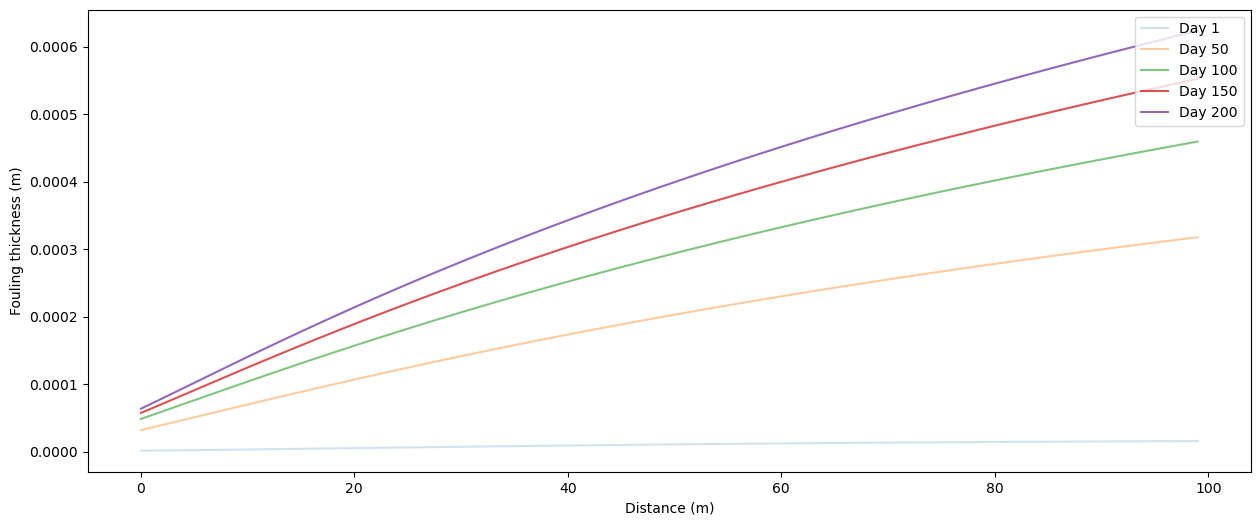

In [17]:
# fouling thickness vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(df_day{k}["Sigma1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling thickness (m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()